Step 1: Download the modified dataset available on CANVAS – toxity_per_attribute.csv

In [2]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import warnings

# If get ModuleNotFoundError, then:
# %pip install [module]

data = pd.read_csv('toxity_per_attribute.csv', low_memory=False) 
# Alternative read:
# https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#basics-dtypes
# dtypes = {'Wiki_ID': 'float32', 'TOXICITY': 'float64', 'lesbian':'boolean', 'gay':'boolean','bisexual':'boolean','transgender':'boolean','trans':'boolean','queer':'boolean','lgbt':'boolean','lgbtq':'boolean','homosexual':'boolean','straight':'boolean','heterosexual':'boolean','male':'boolean','female':'boolean','nonbinary':'boolean','african':'boolean','african american':'boolean','black':'boolean','white':'boolean','european':'boolean','hispanic':'boolean','latino':'boolean','latina':'boolean','latinx':'boolean','mexican':'boolean','canadian':'boolean','american':'boolean','asian':'boolean','indian':'boolean','middle eastern':'boolean','chinese':'boolean','japanese':'boolean','christian':'boolean','muslim':'boolean','jewish':'boolean','buddhist':'boolean','catholic':'boolean','protestant':'boolean','sikh':'boolean','taoist':'boolean','old':'boolean','older':'boolean','young':'boolean','younger':'boolean','teenage':'boolean','millenial':'boolean','middle aged':'boolean','elderly':'boolean','blind':'boolean','deaf':'boolean','paralyzed':'boolean'}
# data = pd.read_csv('toxity_per_attribute.csv', dtype=dtypes)  
print('data count: ' + str(data.Wiki_ID.count()))  # 76,563
print('length: ' + str(len(data.index)))  # Hmm, not the same as length: 76,565?


data count: 76563
length: 76565


Step 2: Identify the protected class categories and members associated with each protected class category.
Provide the classification results

In [3]:
print('columns: ')
print(data.columns)

protected_classes = {
    'race_color_nationality': [
		'african american', 'black', 'white', 'hispanic', 'latino', 'latina', 'latinx', 'asian', 'middle eastern', 'african', 'european', 'mexican', 'canadian', 'american', 'indian', 'chinese', 'japanese'
    ],
    'sex': [
    	'lesbian', 'gay', 'bisexual', 'queer', 'lgbt', 'lgbtq', 'homosexual', 'straight', 'heterosexual', 'male', 'female', 'nonbinary', 'transgender', 'trans'
    ],
    'religion': [
        'christian', 'muslim', 'jewish', 'buddhist', 'catholic', 'protestant', 'sikh', 'taoist' 
    ],
    'age': [
        'old', 'older', 'young', 'younger', 'teenage', 'millenial', 'middle aged', 'elderly'  
    ],
    'disability': [
         'blind', 'deaf', 'paralyzed'
    ]
    }

for protected_class in protected_classes:
    print(f"\n* Protected class: {protected_class}")
    print('* class members:')
    for class_member in protected_classes[protected_class]:
        print(f"\t- {class_member}")
print('\n')



columns: 
Index(['Wiki_ID', 'TOXICITY', 'lesbian', 'gay', 'bisexual', 'transgender',
       'trans', 'queer', 'lgbt', 'lgbtq', 'homosexual', 'straight',
       'heterosexual', 'male', 'female', 'nonbinary', 'african',
       'african american', 'black', 'white', 'european', 'hispanic', 'latino',
       'latina', 'latinx', 'mexican', 'canadian', 'american', 'asian',
       'indian', 'middle eastern', 'chinese', 'japanese', 'christian',
       'muslim', 'jewish', 'buddhist', 'catholic', 'protestant', 'sikh',
       'taoist', 'old', 'older', 'young', 'younger', 'teenage', 'millenial',
       'middle aged', 'elderly', 'blind', 'deaf', 'paralyzed'],
      dtype='object')

* Protected class: race_color_nationality
* class members:
	- african american
	- black
	- white
	- hispanic
	- latino
	- latina
	- latinx
	- asian
	- middle eastern
	- african
	- european
	- mexican
	- canadian
	- american
	- indian
	- chinese
	- japanese

* Protected class: sex
* class members:
	- lesbian
	- gay
	- bisex

* Note, while Race, Color, and National origin are 3 separate protected classes, it's not clear whether some of the columns fall into one protected class or another (or multiple classes). So, I combined all 3 into 1 protected class: race_color_nationality. (Moreover, I'm assuming that the column 'jewish' refers to the religion, not the race.) Also note that while it's not clear whether sexuality / sexual preference / orientation fall under the category of the protected class Sex (historically referring to biological sex or gender), here I am assuming that they do - as Ruth Bader Ginsburg said - "on the basis of sex".


Step 3:
Create a reduced data set by deleting any rows that have all FALSE values for every column in that row. Note: This is the reduced data set that you will use in all subsequent steps.

In [4]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html
data.dropna(inplace=True)
print('data count, post dropna: ' + str(data.Wiki_ID.count()))  # still 76,563?
print('data length, post dropna: ' + str(len(data.index)))  # that's better

data_new = data.drop(data.query('lesbian == False and gay == False and bisexual == False and queer == False and lgbt == False and lgbtq == False and homosexual == False and straight == False and heterosexual == False and male == False and female == False and nonbinary == False and transgender == False and trans == False and african == False and `african american` == False and black == False and white == False and european == False and hispanic == False and latino == False and latina == False and latinx == False and mexican == False and canadian == False and american == False and asian == False and indian == False and `middle eastern` == False and chinese == False and japanese == False and christian == False and muslim == False and jewish == False and buddhist == False and catholic == False and protestant == False and sikh == False and taoist == False and old == False and older == False and young == False and younger == False and teenage == False and millenial == False and `middle aged` == False and elderly == False and blind == False and deaf == False and paralyzed == False').index)
print('data count where all != False: ' + str(data_new.Wiki_ID.count()))


data count, post dropna: 76563
data length, post dropna: 76563
data count where all != False: 75699


Using the reduced data set, identify an ordering scheme for each protected class category by defining values for each of its protected class member. 

Using your assigned numerical values, create a compacted data set by combining the columns
associated with the related protected class members into one column representing the protected class category.

In [5]:
combined_group_members = {
    'race_color_nationality': {
        'asian_group': ['asian', 'chinese', 'japanese'],
        'black_group': ['african', 'african american', 'black'],
        'hispanic_group': ['hispanic', 'latino', 'latina', 'latinx', 'mexican'],
        'white_group': ['american', 'canadian', 'european', 'white'],
        'nota': ['indian', 'middle eastern']
    },
    'sex': {
        'not_straight': ['bisexual', 'gay', 'homosexual', 'lesbian', 'lgbt', 'lgbtq', 'queer'],
        'straight_group': ['heterosexual', 'straight'],
        'binary_group': ['female', 'male'],
        'not_binary': ['nonbinary', 'transgender', 'trans'],
    },
    'religion': {
        'christian_group': ['catholic', 'christian', 'protestant'],
        'not_christian': ['buddhist', 'jewish', 'muslim', 'sikh', 'taoist']
    },  
    'age': {
        'young_group': ['young', 'younger', 'teenage'],
        'middle': ['millenial', 'middle aged'],
        'old_group': ['elderly',  'older',  'old']
    },
    'disability': {
    }
}

ordering_scheme = {
    'race_color_nationality': ['asian_group', 'black_group', 'hispanic_group', 'white_group', 'nota'],
    'sex': ['not_straight', 'straight_group', 'binary_group', 'not_binary'],
    'religion': ['christian_group', 'not_christian'],
    'age': ['young_group', 'middle', 'old_group'],
    'disability': ['blind', 'deaf', 'paralyzed']
    }

key_cols = ['Wiki_ID', 'TOXICITY']
categories = list(ordering_scheme.keys())

for category in ordering_scheme.keys():
    groups_of_category = combined_group_members[category]
    for category_index, category_group in enumerate(ordering_scheme[category], start=1):
        if category_group in groups_of_category.keys():
            category_items = groups_of_category[category_group]
            data_new[category_group] = data_new[category_items].max(axis=1).replace(1, category_index)
        else:
            data_new[category_group] = data_new[category_group].replace(1, category_index)
            
for protected_class in ordering_scheme:
    data_new[protected_class] = data_new[ordering_scheme[protected_class]].max(axis=1)

data_categorized = data_new[key_cols + categories].reset_index(drop=True)

data_categorized.head(10)


,Wiki_ID,TOXICITY,race_color_nationality,sex,religion,age,disability
0,0.0,0.096492,4.0,0.0,0.0,0.0,0.0
1,1.0,0.017991,0.0,4.0,0.0,0.0,0.0
2,2.0,0.150298,0.0,1.0,0.0,0.0,0.0
3,3.0,0.065861,3.0,0.0,0.0,0.0,0.0
4,4.0,0.667166,0.0,0.0,2.0,0.0,0.0
5,5.0,0.322415,0.0,0.0,2.0,0.0,0.0
6,6.0,0.663428,3.0,0.0,0.0,0.0,0.0
7,7.0,0.136357,0.0,4.0,0.0,0.0,0.0
8,8.0,0.146193,3.0,0.0,0.0,0.0,0.0
9,9.0,0.012937,4.0,0.0,0.0,0.0,0.0


Calculate the correlation between the protected class category and TOXICITY. Provide the correlation coefficients in table format and identify the strength of the correlation. Select the three highest correlation coefficients and plot data for the correlated variables; indicate its correlation strength (Note: there may/may not be any strong correlations in this dataset.)

As guidance, can use (Evans, J. D. (1996). Straightforward statistics for the behavioral sciences. Brooks/Cole Publishing) which suggests the following related to the absolute value of the correlation coefficient:

- .00-.19 “very weak” correlation 
- .20-.39 “weak” correlation
- .40-.59 “moderate” correlation 
- .60-.79 “strong” correlation
- .80-1.0 “very strong” correlation

Correlations of toxicity with protected classes:

Race / color / nationality correlation: -0.148 (negative very weak correlation)
Sex correlation: 0.100 (positive very weak correlation)
Religion correlation: 0.004 (positive very weak correlation)
Age correlation: -0.043 (negative very weak correlation)
Disability correlation: 0.012 (positive very weak correlation)

Top 3: 


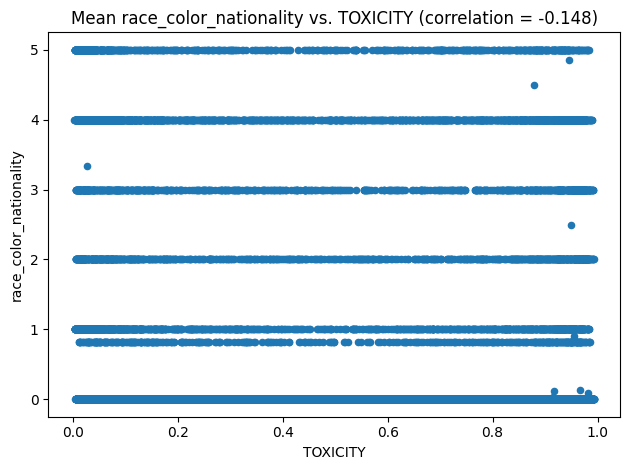

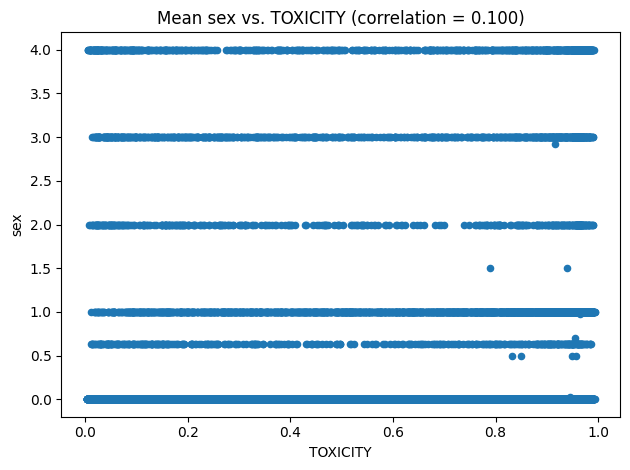

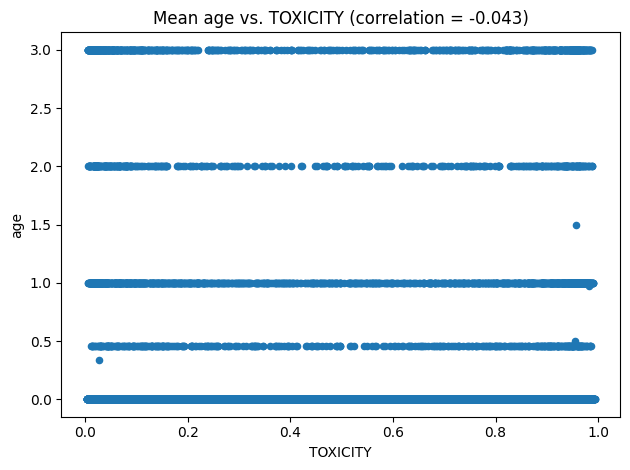

In [6]:
# From page 145 of Module 2:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html
# Using scipy.stats.pearsonr(X, Y)
# From https://en.wikipedia.org/wiki/Pearson_correlation_coefficient :
# the ratio between the covariance of two variables and the product of their standard deviations
def correlation_category(correlation_value):
    if correlation_value < 0:
        output = ' (negative '
    else:
        output = ' (positive '
    if abs(correlation_value) < 0.2:
        output += 'very weak correlation)'
    elif abs(correlation_value) < 0.4:
        output += 'weak correlation)'
    elif abs(correlation_value) < 0.6:
        output += 'moderate correlation)'
    elif abs(correlation_value) < 0.8:
        output += 'strong correlation)'
    else:
        output += 'very strong correlation)'
    return output
    
correlation_key = 'TOXICITY'
correlation_columns_labels = {
    'race_color_nationality': 'Race / color / nationality',
    'sex': 'Sex',
    'religion': 'Religion',
    'age': 'Age',
    'disability': 'Disability'}
    
correlations_dict = {}
correlations_list = []

print('Correlations of toxicity with protected classes:\n')

for correlation_column in correlation_columns_labels.keys():
    correlation = stats.pearsonr(data_categorized[correlation_key], data_categorized[correlation_column])
    correlations_dict[correlation.statistic] = correlation_column
    correlations_list.append(correlation.statistic)
    print(correlation_columns_labels[correlation_column] + ' correlation: ', end='')
    print("%.3f" % correlation.statistic, end='')
    print(correlation_category(correlation.statistic))


def my_sort(n):
    return abs(n)

correlations_list.sort(key=my_sort, reverse=True)

warnings.filterwarnings('ignore')

print('\nTop 3: ')
for i in range(3):
    # print("%.3f" % correlations_list[i] + " : " + correlations_dict[correlations_list[i]])
    data_plot = data_categorized[[correlation_key, correlations_dict[correlations_list[i]]]]
    data_plot_aggregated = data_plot.groupby(correlation_key, as_index=False).mean()
    n_rows = 1
    n_cols = 1
    _, ax = plt.subplots(n_rows, n_cols, tight_layout=True)
    title = f"Mean {correlations_dict[correlations_list[i]]} vs. {correlation_key} (correlation = {correlations_list[i]:.3f})"

    ax = data_plot_aggregated.plot(
        x=correlation_key, y=correlations_dict[correlations_list[i]], kind="scatter",
        title=title,
        ax=ax)
    ax.set_xlabel(correlation_key)
    ax.set_ylabel(correlations_dict[correlations_list[i]])
    plt.show()


Step 4: Using your reduced data set (from the first task in Step 3), calculate the population mean and population standard deviation of TOXICITY. What is the range of values around the mean that includes 95% of TOXICITY? Run the random sampling method using 10% and 60% of the data. For each, what is the mean, standard deviation, and margin of error? Note: Although, for this and the following questions, TOXICITY may/may not follow a normal distribution, feel free to use the methods discussed in the lecture (i.e. it is not expected for you to explore new methods).

In [7]:
toxic_mean = data_categorized.TOXICITY.mean()
toxic_std = data_categorized.TOXICITY.std(ddof=0) # ddof: degrees of freedom to use; 1 = sample; 0 = population
# https://numpy.org/doc/stable/reference/generated/numpy.std.html
# "Means Delta Degrees of Freedom. The divisor used in calculations is N - ddof, where N represents the number 
# of elements. "
# huh?
# "ddof=1 provides an unbiased estimator of the variance of the infinite population. ddof=0 provides a maximum 
# likelihood estimate of the variance for normally distributed variables. The standard deviation computed in this 
# function is the square root of the estimated variance, so even with ddof=1, it will not be an unbiased estimate 
# of the standard deviation per se."
# wth?
# https://datascienceparichay.com/article/calculate-standard-deviation-in-python/
# "To get the population standard deviation, pass ddof = 0 to the std() function"
# oh
# https://datagy.io/python-standard-deviation/
# "ddof is a value of degrees of freedom. We apply 1, since we are calculating the standard deviation for a 
# sample (rather than an entire population)"
# These last two are easy to understand. Why does numpy.org have to be so obscure?
print("mean: %.3f" % toxic_mean)
print("std: %.3f" % toxic_std)

values = data_categorized.TOXICITY.values
mean = values.mean()
std = values.std(ddof=0)
samples = np.linspace(0, 1, 100)
lower_value = 0.0
upper_value = 1.0
for index, sample in enumerate(samples, start=1):
    std_index = std * (1 + sample)
    lower_value = np.clip(mean - std_index, min(values), None)
    upper_value = np.clip(mean + std_index, None, max(values))
    array = np.asarray(np.logical_and(values > lower_value, values < upper_value)).nonzero()
    proportion = len(array[0]) / len(values)
    if proportion >= 0.95:
        break

print(f"Range of values around the mean that includes 95% of TOXICITY: ({lower_value:.3f}, {upper_value:.3f})\n")

data_10 = data_categorized.sample(frac=.10, replace=False)
toxic_10_mean = data_10.TOXICITY.mean()
toxic_10_std = data_10.TOXICITY.std(ddof=1) # ddof: degrees of freedom to use; 1 = sample; 0 = population
toxic_10_margin_of_error = (1 / np.sqrt(data_10.shape[0]))
print(f"10% sample mean toxicity: {toxic_10_mean:.3f}")
print(f"10% sample standard deviation toxicity: {toxic_10_std:.3f}")
print(f"10% sample 95% margin of error: {100 * toxic_10_margin_of_error:.3f}%\n")

data_60 = data_categorized.sample(frac=.60, replace=False)
toxic_60_mean = data_60.TOXICITY.mean()
toxic_60_std = data_60.TOXICITY.std(ddof=1) # ddof: degrees of freedom to use; 1 = sample; 0 = population
toxic_60_margin_of_error = (1 / np.sqrt(data_60.shape[0]))
print(f"60% sample mean toxicity: {toxic_60_mean:.3f}.")
print(f"60% sample standard deviation toxicity: {toxic_60_std:.3f}.")
print(f"60% sample 95% margin of error: {100 * toxic_60_margin_of_error:.3f}%.")

mean: 0.550
std: 0.362
Range of values around the mean that includes 95% of TOXICITY: (0.024, 0.993)

10% sample mean toxicity: 0.545
10% sample standard deviation toxicity: 0.363
10% sample 95% margin of error: 1.149%

60% sample mean toxicity: 0.549.
60% sample standard deviation toxicity: 0.361.
60% sample 95% margin of error: 0.469%.


Step 5: Using your reduced data set, calculate the mean and standard deviation of TOXICITY associated with the protected class category (Hint: TOXICITY values should only be included in the calculation when the associated protected class value is not FALSE). Run the random sampling method using 10% and 60% of the data. For each, what is the mean and standard deviation? Calculate MoE using each sample size and Indicate (yes/no) if the mean values lie within the associated population margin of error.

In [8]:
category = 'religion'

data_step5 = data_categorized[key_cols + [category]]
data_step5 = data_step5[data_step5[category] != 0].reset_index(drop=True)
data_step5[category] = 1
data_step5_grouped = data_step5.groupby(category, as_index=False).agg(
    mean=('TOXICITY', 'mean'),
    std=('TOXICITY', 'std'),
    count=('TOXICITY', 'count')
    ).drop(category, axis=1)

print('The mean and standard deviation of TOXICITY associated with the protected class of Religion:')
display(data_step5_grouped)

def is_within(x,y,z):
    # Check to see if y is between x & z
    if x <= y and y <= z:
        return 'YES'
    else:
        return 'NO'

data_step5_10 = data_step5.sample(frac=.10, replace=False)
data_step5_10 = data_step5_10[data_step5_10[category] != 0].reset_index(drop=True)
data_step5_10_grouped = data_step5_10.groupby(category, as_index=False).agg(
    mean=("TOXICITY", "mean"),
    std=("TOXICITY", "std"),
    count=("TOXICITY", "count")
    )

data_step5_10_grouped['margin_of_error'] = 1 / np.sqrt(data_step5_10_grouped['count'])
data_step5_10_grouped['lower'] = data_step5_10_grouped['mean'] - data_step5_10_grouped['margin_of_error']
data_step5_10_grouped['upper'] = data_step5_10_grouped['mean'] + data_step5_10_grouped['margin_of_error']

print('\nThe mean, standard deviation, and margin of error using a 10% sample:')
display(data_step5_10_grouped)
mean = data_step5_10_grouped['mean'][0]
lower = data_step5_10_grouped['lower'][0]
upper = data_step5_10_grouped['upper'][0]
print(f"Does the mean value ({mean:.3f}) lie within the associated population margin of error ({lower:.3f},{upper:.3f})? " + is_within(lower, mean, upper))

data_step5_60 = data_step5.sample(frac=.60, replace=False)
data_step5_60 = data_step5_60[data_step5_60[category] != 0].reset_index(drop=True)
data_step5_60_grouped = data_step5_60.groupby(category, as_index=False).agg(
    mean=("TOXICITY", "mean"),
    std=("TOXICITY", "std"),
    count=("TOXICITY", "count")
    )

data_step5_60_grouped['margin_of_error'] = 1 / np.sqrt(data_step5_60_grouped['count'])
data_step5_60_grouped['lower'] = data_step5_60_grouped['mean'] - data_step5_60_grouped['margin_of_error']
data_step5_60_grouped['upper'] = data_step5_60_grouped['mean'] + data_step5_60_grouped['margin_of_error']

print('\nThe mean, standard deviation, and margin of error using a 60% sample:')
display(data_step5_60_grouped)
mean = data_step5_60_grouped['mean'][0]
lower = data_step5_60_grouped['lower'][0]
upper = data_step5_60_grouped['upper'][0]
print(f"Does the mean value ({mean:.3f}) lie within the associated population margin of error ({lower:.3f},{upper:.3f})? " + is_within(lower, mean, upper))

The mean and standard deviation of TOXICITY associated with the protected class of Religion:


,mean,std,count
0,0.547688,0.357665,12111



The mean, standard deviation, and margin of error using a 10% sample:


,religion,mean,std,count,margin_of_error,lower,upper
0,1,0.550325,0.352746,1211,0.028736,0.521589,0.579061


Does the mean value (0.550) lie within the associated population margin of error (0.522,0.579)? YES

The mean, standard deviation, and margin of error using a 60% sample:


,religion,mean,std,count,margin_of_error,lower,upper
0,1,0.546357,0.357347,7267,0.011731,0.534626,0.558087


Does the mean value (0.546) lie within the associated population margin of error (0.535,0.558)? YES


Step 6: Using your reduced data set, calculate the mean and standard deviation of TOXICITY associated with each subgroup that is a member of the protected class category (Hint: TOXICITY values should only be included in the calculation when the associated protected class value is not FALSE). Run the random sampling method using 10% and 60% of the data. For each subgroup, what is the mean and standard deviation? Calculate MoE using each sample size and indicate (yes/no) if the mean values lie within the associated population margin of error.

In [9]:
data_step6 = data_categorized[key_cols + [category]]
data_step6 = data_step6[data_step6[category] != 0].reset_index(drop=True)
data_step6['group'] = 1
data_step6_grouped = data_step6.groupby('group', as_index=False).agg(
    mean=('TOXICITY', 'mean'),
    std=('TOXICITY', 'std'),
    count=('TOXICITY', 'count')
    ).drop('group', axis=1)

print('The mean and standard deviation of TOXICITY associated with the protected class of Religion:')
display(data_step6_grouped)

def is_within(x,y,z):
    # Check to see if y is between x & z
    if x <= y and y <= z:
        return 'YES'
    else:
        return 'NO'

data_step6_10 = data_step6.sample(frac=.10, replace=False)
data_step6_10 = data_step6_10[data_step6_10[category] != 0].reset_index(drop=True)
data_step6_10_grouped = data_step6_10.groupby(category, as_index=False).agg(
    mean=("TOXICITY", "mean"),
    std=("TOXICITY", "std"),
    count=("TOXICITY", "count")
    )

data_step6_10_grouped['margin_of_error'] = 1 / np.sqrt(data_step6_10_grouped['count'])
data_step6_10_grouped['lower'] = data_step6_10_grouped['mean'] - data_step6_10_grouped['margin_of_error']
data_step6_10_grouped['upper'] = data_step6_10_grouped['mean'] + data_step6_10_grouped['margin_of_error']

print('\nThe mean, standard deviation, and margin of error using a 10% sample:')
display(data_step6_10_grouped)
mean = data_step6_10_grouped['mean'][0]
lower = data_step6_10_grouped['lower'][0]
upper = data_step6_10_grouped['upper'][0]
print(f"Does the mean value ({mean:.3f}) lie within the associated population margin of error ({lower:.3f},{upper:.3f})? " + is_within(lower, mean, upper))

data_step6_60 = data_step6.sample(frac=.60, replace=False)
data_step6_60 = data_step6_60[data_step6_60[category] != 0].reset_index(drop=True)
data_step6_60_grouped = data_step5_60.groupby(category, as_index=False).agg(
    mean=("TOXICITY", "mean"),
    std=("TOXICITY", "std"),
    count=("TOXICITY", "count")
    )

data_step6_60_grouped['margin_of_error'] = 1 / np.sqrt(data_step6_60_grouped['count'])
data_step6_60_grouped['lower'] = data_step6_60_grouped['mean'] - data_step6_60_grouped['margin_of_error']
data_step6_60_grouped['upper'] = data_step6_60_grouped['mean'] + data_step6_60_grouped['margin_of_error']

print('\nThe mean, standard deviation, and margin of error using a 60% sample:')
display(data_step6_60_grouped)
mean = data_step6_60_grouped['mean'][0]
lower = data_step6_60_grouped['lower'][0]
upper = data_step6_60_grouped['upper'][0]
print(f"Does the mean value ({mean:.3f}) lie within the associated population margin of error ({lower:.3f},{upper:.3f})? " + is_within(lower, mean, upper))

The mean and standard deviation of TOXICITY associated with the protected class of Religion:


,mean,std,count
0,0.547688,0.357665,12111



The mean, standard deviation, and margin of error using a 10% sample:


,religion,mean,std,count,margin_of_error,lower,upper
0,1.0,0.517109,0.360553,443,0.047511,0.469598,0.564621
1,2.0,0.574008,0.350442,768,0.036084,0.537923,0.610092


Does the mean value (0.517) lie within the associated population margin of error (0.470,0.565)? YES

The mean, standard deviation, and margin of error using a 60% sample:


,religion,mean,std,count,margin_of_error,lower,upper
0,1,0.546357,0.357347,7267,0.011731,0.534626,0.558087


Does the mean value (0.546) lie within the associated population margin of error (0.535,0.558)? YES


Step 7: Plot (on one graph) - 1) the computed population mean/standard deviation (Step 4), (2) the computed mean/standard deviation for the protected class category (Step 5), and (3) the computed mean/standard deviation for each subgroup of the protected class category (Step 6). Which of the subgroups has the highest TOXICITY value? Which of the subgroups has the lowest TOXICITY value? Which of the subgroups has the largest difference in TOXICITY value when compared to the population mean? Does there seem to be any human bias in the data? Explain (in no more than 3-5 sentences).

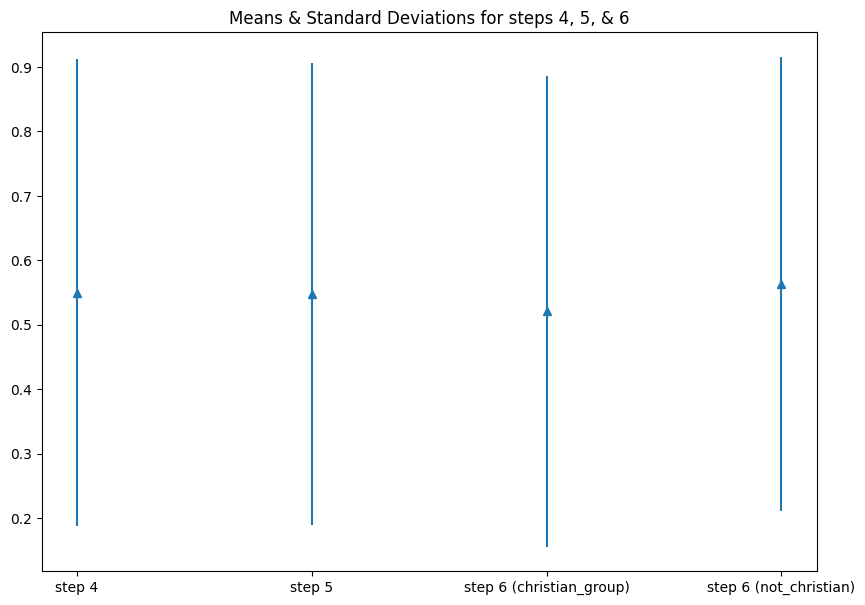

Which of the subgroups has the highest TOXICITY value? not_christian
Which of the subgroups has the lowest TOXICITY value? christian_group
Which of the subgroups has the largest difference in TOXICITY value when compared to the population mean? 
	not_christian
Does there seem to be any human bias in the data?
	There does not seem to be any significant bias in the protected class I chose (religion), 
as the mean of each subgroups is within the standard deviation of each subgroup and each subgroup's 
mean is not far from the category's mean. However, there does seem to be some bias in the protected 
class Sex, particularly in the label "gay", as demonstrated in this reading material: 
https://www.aies-conference.com/2018/contents/papers/main/AIES_2018_paper_9.pdf


In [16]:
# step 4: the computed population mean/standard deviation
toxic_mean = data_categorized.TOXICITY.mean()
toxic_std = data_categorized.TOXICITY.std(ddof=0)
# step 5: the computed mean/standard deviation for the protected class category
category = 'religion'
data_step5 = data_categorized[key_cols + [category]]
data_step5 = data_step5[data_step5[category] != 0].reset_index(drop=True)
data_step5[category] = 1
data_step5_grouped = data_step5.groupby(category, as_index=False).agg(
    mean=('TOXICITY', 'mean'),
    std=('TOXICITY', 'std'),
    count=('TOXICITY', 'count')
    ).drop(category, axis=1)
# step 6: the computed mean/standard deviation for each subgroup of the protected class category
data_step6 = data_categorized[key_cols + [category]]
data_step6 = data_step6[data_step6[category] != 0].reset_index(drop=True)
data_step6_grouped = data_step6.groupby(category, as_index=False).agg(
    mean=('TOXICITY', 'mean'),
    std=('TOXICITY', 'std'),
    count=('TOXICITY', 'count')
    )

x_values = [0, 1, 2, 3]
y_values = [toxic_mean, data_step5_grouped['mean'].item(), data_step6_grouped['mean'].values[0], data_step6_grouped['mean'].values[1]]
y_errors = [toxic_std, data_step5_grouped['std'].item(), data_step6_grouped['std'].values[0], data_step6_grouped['std'].values[1]]

n_rows = 1
n_cols = 1

_, ax = plt.subplots(n_rows, n_cols, figsize=(10, 7))
ax.set_title("Means & Standard Deviations for steps 4, 5, & 6")
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html
ax.errorbar(x_values, y_values, y_errors, linestyle='None', marker='^')
x_labels = ["step 4", "step 5", "step 6 (christian_group)",  "step 6 (not_christian)"]
ax.set_xticks(x_values)
ax.set_xticklabels(x_labels)
plt.show()

compare_dict = {}
for i in range(len(data_step6_grouped['mean'].values)):
    compare_dict.update({data_step6_grouped['mean'].values[i]: ordering_scheme[category][i]})


def which_is_higher(compare):
    high = 0
    for value in compare.keys():
        if value > high:
            high = value
    return compare[high]


def which_is_lower(compare):
    low = 2
    for value in compare.keys():
        if value < low:
            low = value
    return compare[low]


def largest_diff(compare, mean):
    largest = 0
    diff_value = 0
    for value in compare.keys():
        if abs(value) - abs(mean) > largest:
            largest = abs(value) - abs(mean)
            diff_value = value
    return compare[diff_value]

def detect_human_bias():
    #TODO: Does this require AGI?
    pass

print('Which of the subgroups has the highest TOXICITY value? ' + which_is_higher(compare_dict))
print('Which of the subgroups has the lowest TOXICITY value? ' + which_is_lower(compare_dict))
print('Which of the subgroups has the largest difference in TOXICITY value when compared to the population mean? \n\t'
      + largest_diff(compare_dict, toxic_mean))
print('Does there seem to be any human bias in the data?\n\t'
     + 'There does not seem to be any significant bias in the protected class I chose (religion), \n'
     + 'as the mean of each subgroups is within the standard deviation of each subgroup and each subgroup\'s \n'
     + 'mean is not far from the category\'s mean. However, there does seem to be some bias in the protected \n'
     + 'class Sex, particularly in the label "gay", as demonstrated in this reading material: \n'
     + 'https://www.aies-conference.com/2018/contents/papers/main/AIES_2018_paper_9.pdf')
